## DevSummit Group Migration Notebook Demo using the ArcGIS API for Python

#### Connect to 10.8.1 Source Enterprise Portal to Extract Group Data

In [ ]:
from arcgis.gis import GIS
source = GIS(profile="sourceEnterprisePortal", verify_cert=False)
source

#### Create Export Package of all items supported

<Group title:"NPS Apps and Data (Dev)" owner:portaladmin>
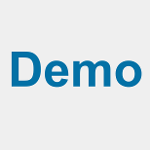

In [157]:
exportGroup = source.groups.get("6a9f19ccdc264e8e94ccb1c569a2e73d")
exportGroup

In [158]:
epk_job = exportGroup.migration.create()
epk_item = epk_job.result()
epk_item

<Item title:"NPS_Apps_and_Data_(Dev)_2021212_104654.epk" type:Export Package owner:portaladmin>

#### Download package

In [159]:
fp = epk_item.download()
print(fp)

/tmp/NPSAppsandDataDev2021212104654.epk


#### Connect to 10.9 Target Enterprise Portal to Import Package

In [ ]:
target = GIS(profile="targetEnterprisePortal", verify_cert=False)
target

#### Clean up previous Demo Run

In [161]:
# Clean up previous data
for i in target.content.search("DEVtoTEST Migration Package"):
    assert i.delete()
for i in target.content.search("DEVtoTEST Migration Package Subset"):
    assert i.delete()
for grp in target.groups.search("TEST Group Migration Demo"):
    assert grp.delete()
target.content.delete_folder('TEST_Group_Migration_Demo')

Folder doesn't exist.


False

#### Add Export Package to Target Portal

In [162]:
pitem = target.content.add({'title': "DEVtoTEST Migration Package", "tags": ['Migration', 'TEST'],
                            'type': 'Export Package'}, data=fp)

In [163]:
pitem

<Item title:"DEVtoTEST Migration Package" type:Export Package owner:bmajor>

#### Create Group

In [164]:
new_group = target.groups.create(title='TEST Group Migration Demo', tags='Migration,TEST')
# Share the item to new group
pitem.share(groups=[new_group])

{'results': [{'itemId': 'afc726f217e8482dbbe8cfd4fcccb095',
   'success': True,
   'notSharedWith': ['']}]}

#### Let's inspect the package

In [165]:
m = new_group.migration
resp = m.inspect(pitem)
from pprint import pprint
pprint(resp)

{'nextStart': -1,
 'num': 6,
 'packageSummary': {'fileName': 'NPS_Apps_and_Data_(Dev)_2021212_104654',
                    'id': 'afc726f217e8482dbbe8cfd4fcccb095',
                    'packageCreated': 1613155614848,
                    'packageVersion': '1.0',
                    'sourcePortalInfo': {'httpUrl': 'http://wdcsol0000612.esri.com/portal',
                                         'httpsUrl': 'https://wdcsol0000612.esri.com/portal',
                                         'isPortal': True,
                                         'portalId': '4fafe5cf-1d6a-41ae-a1af-cac53f200aa4',
                                         'version': '10.8.1'}},
 'results': [{'canImport': True,
              'created': 1613076529327,
              'exists': False,
              'id': '9ecc5c44dd2542e5ad826eac73ffa673',
              'modified': 1613147323671,
              'size': 707,
              'title': 'NPS Places App',
              'type': 'Web Mapping Application'},
             {'c

#### Import  Package into new Group

In [166]:
res = m.load(pitem, overwrite=True, future=False)
print(res)

{'itemsImported': [<Item title:"NPSPoints_of_Interest_POIs_Web_Mercator" type:Shapefile owner:bmajor>, <Item title:"NPSPoints_of_Interest_POIs_Web_Mercator" type:Feature Layer Collection owner:bmajor>, <Item title:"NPS Places Map" type:Web Map owner:bmajor>, <Item title:"NPS Places App" type:Web Mapping Application owner:bmajor>, <Item title:"NPS Apps Documentation" type:PDF owner:bmajor>, <Item title:"NPS Presentation" type:Microsoft Powerpoint owner:bmajor>], 'itemsSkipped': [], 'itemsFailedImport': []}


#### Do Item IDs match???

In [167]:
source_fs = source.content.search("NPSPoints_of_Interest_POIs_Web_Mercator", item_type="Feature Service")[0]
target_fs = target.content.search("NPSPoints_of_Interest_POIs_Web_Mercator", item_type="Feature Service")[0]
print(source_fs.itemid, target_fs.itemid)
assert source_fs.itemid == target_fs.itemid, "They don't match :("

22bd340a9ea1437fac7e31cb90b6d0fc 22bd340a9ea1437fac7e31cb90b6d0fc


### Suppose I only want to export a subset of items?

In [168]:
epk_job_subset = exportGroup.migration.create(items=[source_fs])
epk_item_subset = epk_job_subset.result()

In [169]:
fp_subset = epk_item_subset.download()
print(fp_subset)

/tmp/NPSAppsandDataDev2021212105637.epk


In [170]:
pitem_subset = target.content.add({'title': "DEVtoTEST Migration Package Subset", "tags": ['Migration', 'TEST'],
                            'type': 'Export Package'}, data=fp_subset)
pitem_subset

<Item title:"DEVtoTEST Migration Package Subset" type:Export Package owner:bmajor>

In [171]:
pitem_subset.share(groups=[new_group])

{'results': [{'itemId': '106a90553fe64e00bfad7464d96adc39',
   'success': True,
   'notSharedWith': ['']}]}

#### Let's inspect it

In [172]:
m = new_group.migration
resp = m.inspect(pitem_subset)
from pprint import pprint
pprint(resp)

{'nextStart': -1,
 'num': 2,
 'packageSummary': {'fileName': 'NPS_Apps_and_Data_(Dev)_2021212_105637',
                    'id': '106a90553fe64e00bfad7464d96adc39',
                    'packageCreated': 1613156197777,
                    'packageVersion': '1.0',
                    'sourcePortalInfo': {'httpUrl': 'http://wdcsol0000612.esri.com/portal',
                                         'httpsUrl': 'https://wdcsol0000612.esri.com/portal',
                                         'isPortal': True,
                                         'portalId': '4fafe5cf-1d6a-41ae-a1af-cac53f200aa4',
                                         'version': '10.8.1'}},
 'results': [{'canImport': True,
              'created': 1613075976395,
              'exists': True,
              'id': '22bd340a9ea1437fac7e31cb90b6d0fc',
              'modified': 1613147323354,
              'size': 2436449,
              'title': 'NPSPoints_of_Interest_POIs_Web_Mercator',
              'type': 'Feature Service

#### Import

In [173]:
res = m.load(pitem_subset, overwrite=True, future=False)
print(res)

{'itemsImported': [<Item title:"NPSPoints_of_Interest_POIs_Web_Mercator" type:Shapefile owner:bmajor>, <Item title:"NPSPoints_of_Interest_POIs_Web_Mercator" type:Feature Layer Collection owner:bmajor>], 'itemsSkipped': [], 'itemsFailedImport': []}


### Suppose I want to run this on a schedule?